conda

In [ ]:
import pandas as pd

# Load your data (make sure it's inside the `data/` folder)
df = pd.read_csv('data/toyotaData.csv', parse_dates=['Date'], dayfirst=True)

# Sort by date (very important for time series)
df = df.sort_values('Date').reset_index(drop=True)
8
# Preview the first few rows
df.head()


C:\Users\PRANAV\AppData\Local\Temp\ipykernel_1204\4269651303.py:4: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df = pd.read_csv('data/toyotaData.csv', parse_dates=['Date'], dayfirst=True)


,Date,Adj Close,Close,High,Low,Open,Volume
0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109
1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343
2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0
3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277
4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409


In [77]:
# Basic structure
df.info()

# Check for missing values
df.isnull().sum()

# Quick statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11291 entries, 0 to 11290
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       11291 non-null  datetime64[ns]
 1   Adj Close  11291 non-null  float64       
 2   Close      11291 non-null  float64       
 3   High       11291 non-null  float64       
 4   Low        11291 non-null  float64       
 5   Open       11291 non-null  float64       
 6   Volume     11291 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 617.6 KB


,Date,Adj Close,Close,High,Low,Open,Volume
count,11291,11291.000000,11291.000000,11291.000000,11291.000000,11291.000000,1.129100e+04
mean,2002-07-28 16:48:32.904082944,63.586275,72.057776,72.478879,71.646418,67.955424,2.146604e+05
min,1980-03-17 00:00:00,2.259452,3.237711,3.237711,3.237711,0.000000,0.000000e+00
25%,1991-05-15 12:00:00,19.224636,27.548208,27.735613,27.548208,0.000000,1.350000e+04
50%,2002-07-25 00:00:00,50.583900,66.040001,66.650002,65.440002,66.000000,9.100000e+04
75%,2013-10-09 12:00:00,104.705669,114.295002,114.895000,113.625000,114.294998,2.923000e+05
max,2024-12-27 00:00:00,254.770004,254.770004,255.229996,253.589996,255.000000,1.858270e+07
std,NaN,52.272225,51.295776,51.552662,50.976716,55.851523,3.874256e+05


#log returns

In [ ]:
import numpy as np

# Create log return column
df['LogReturn'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))

# Drop NaN created by shift to remove the first day as there is no previous day
df = df.dropna().reset_index(drop=True)

# Preview
df[['Date', 'Adj Close', 'LogReturn']].head()


,Date,Adj Close,LogReturn
0,1980-03-18,2.306134,0.004057
1,1980-03-19,2.306134,0.000000
2,1980-03-20,2.306134,0.000000
3,1980-03-21,2.362154,0.024001
4,1980-03-24,2.371490,0.003945


In [79]:
# Check for any remaining NaNs
df.isnull().sum()

# Check return range
df['LogReturn'].describe()


count    11290.000000
mean         0.000395
std          0.018175
min         -0.180606
25%         -0.008772
50%          0.000000
75%          0.009102
max          0.176931
Name: LogReturn, dtype: float64

#IMPORT THE GARCH MODEL

In [80]:
from arch import arch_model




In [ ]:
# Create the GARCH(1,1) model,p(ARCH)->looks one day back,q(GARCH)->looks one day back
model = arch_model(df['LogReturn'], vol='Garch', p=1, q=1)

# Fit the model , disp = 'off'->not to print out all the convergence and optimization details while it's running,
model_fit = model.fit(disp='off')

# Display summary
print(model_fit.summary())


                     Constant Mean - GARCH Model Results                      
Dep. Variable:              LogReturn   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                30560.5
Distribution:                  Normal   AIC:                          -61113.1
Method:            Maximum Likelihood   BIC:                          -61083.8
                                        No. Observations:                11290
Date:                Wed, Jul 23 2025   Df Residuals:                    11289
Time:                        18:55:16   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         4.5572e-04  1.729e-04      2.636  8.379e-03 [1.

c:\Users\PRANAV\anaconda3\envs\risk_analysis\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003303. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [82]:
# Use in-sample predicted volatility (conditional standard deviation)
df['Volatility'] = model_fit.conditional_volatility


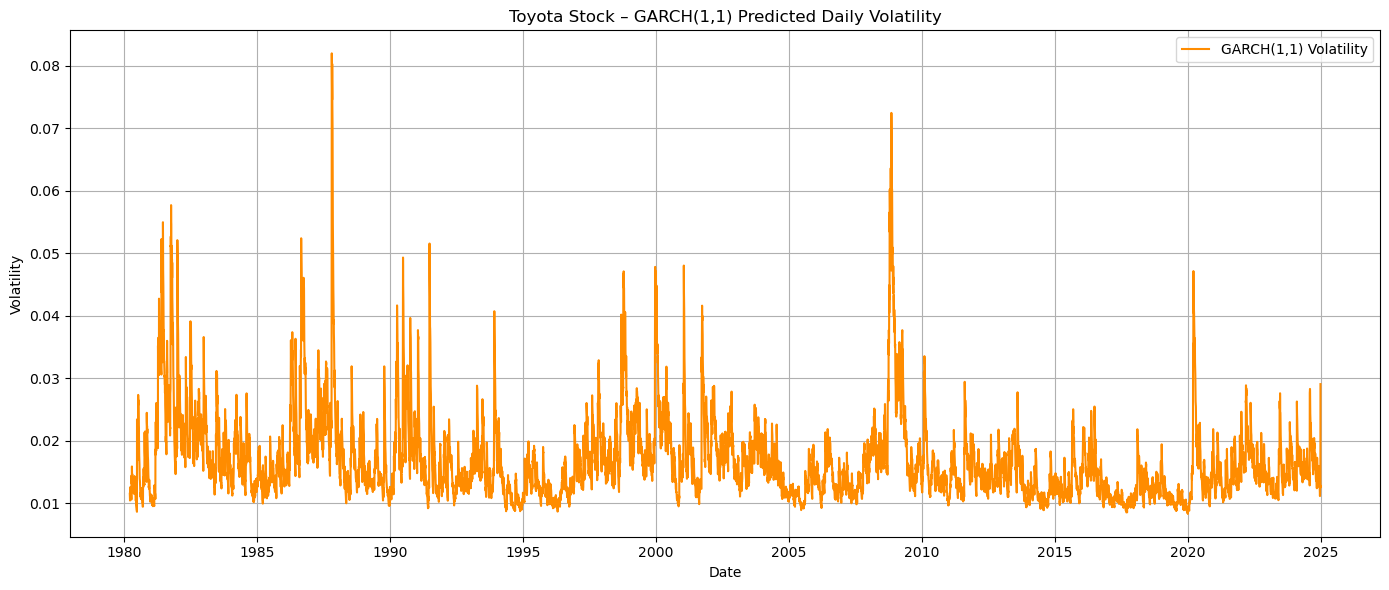

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Volatility'], label='GARCH(1,1) Volatility', color='darkorange')
plt.title("Toyota Stock – GARCH(1,1) Predicted Daily Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


--- Cleaning DataFrame before computation ---
DataFrame cleaned.

--- Starting Computations ---
✅ CSV already exists: 'rolling_vol_7d.csv' — skipping GARCH computation.
✅ CSV already exists: 'rolling_vol_30d.csv' — skipping GARCH computation.
✅ CSV already exists: 'rolling_vol_90d.csv' — skipping GARCH computation.
✅ CSV already exists: 'rolling_vol_250d.csv' — skipping GARCH computation.

--- Computation Complete ---
All columns are now available in the DataFrame:
Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'LogReturn', 'MA_5', 'MA_10', 'Momentum', 'Lag1_Return', 'Lag2_Return',
       'Lag1_Volatility', 'TargetVolatility', 'RollingVolatility_7d',
       'RollingVolatility_30d', 'RollingVolatility_90d',
       'RollingVolatility_250d'],
      dtype='object')

📊 Generating 7-Day Volatility Plot...


C:\Users\PRANAV\AppData\Local\Temp\ipykernel_1204\689738787.py:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[f'RollingVolatility_{window}d'] = df[f'RollingVolatility_{window}d'].fillna(method='ffill')
C:\Users\PRANAV\AppData\Local\Temp\ipykernel_1204\689738787.py:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[f'RollingVolatility_{window}d'] = df[f'RollingVolatility_{window}d'].fillna(method='ffill')
C:\Users\PRANAV\AppData\Local\Temp\ipykernel_1204\689738787.py:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[f'RollingVolatility_{window}d'] = df[f'RollingVolatility_{window}d'].fillna(method='ffill')
C:\Users\PRANAV\AppData\Local\Temp\ipykernel_1204\689738787.py:20: FutureWarning: Series.fillna with 'method'

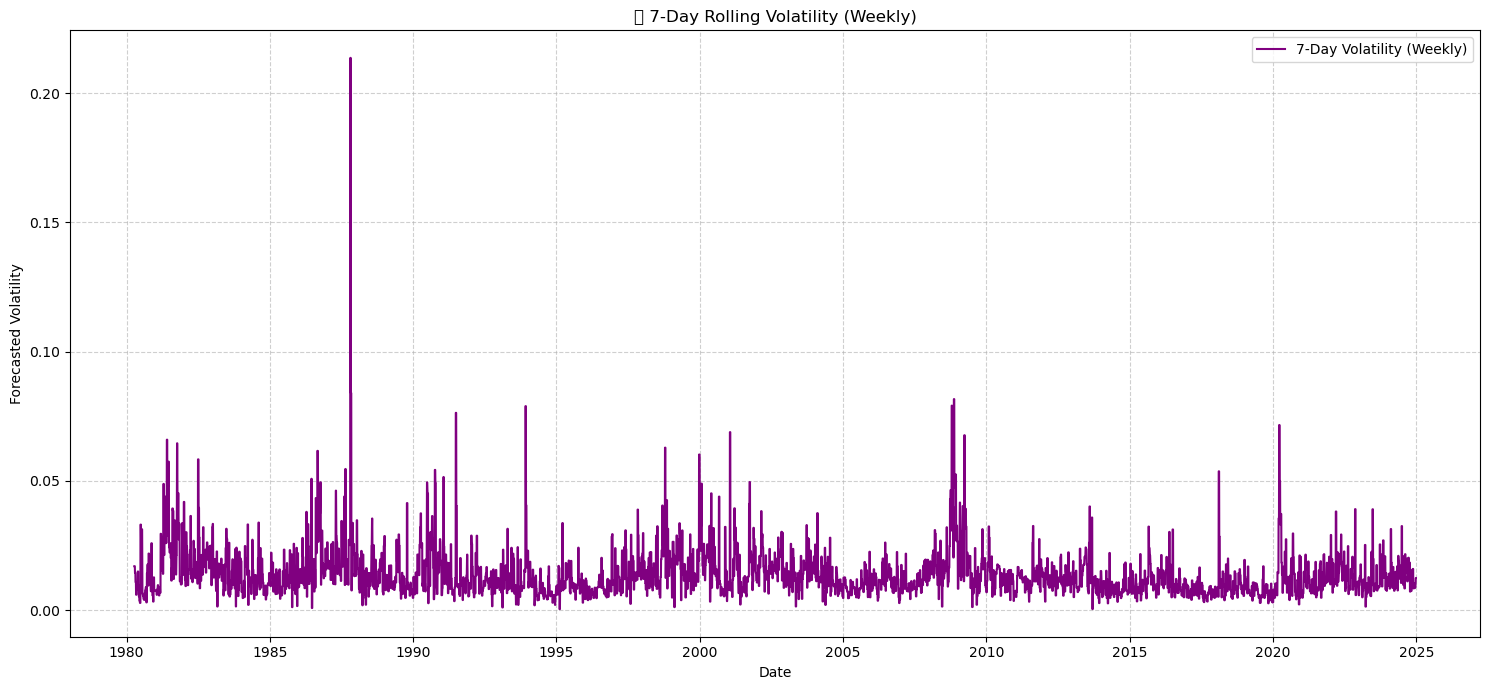


📊 Generating 30-Day Volatility Plot...


C:\Users\PRANAV\AppData\Local\Temp\ipykernel_1204\689738787.py:99: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


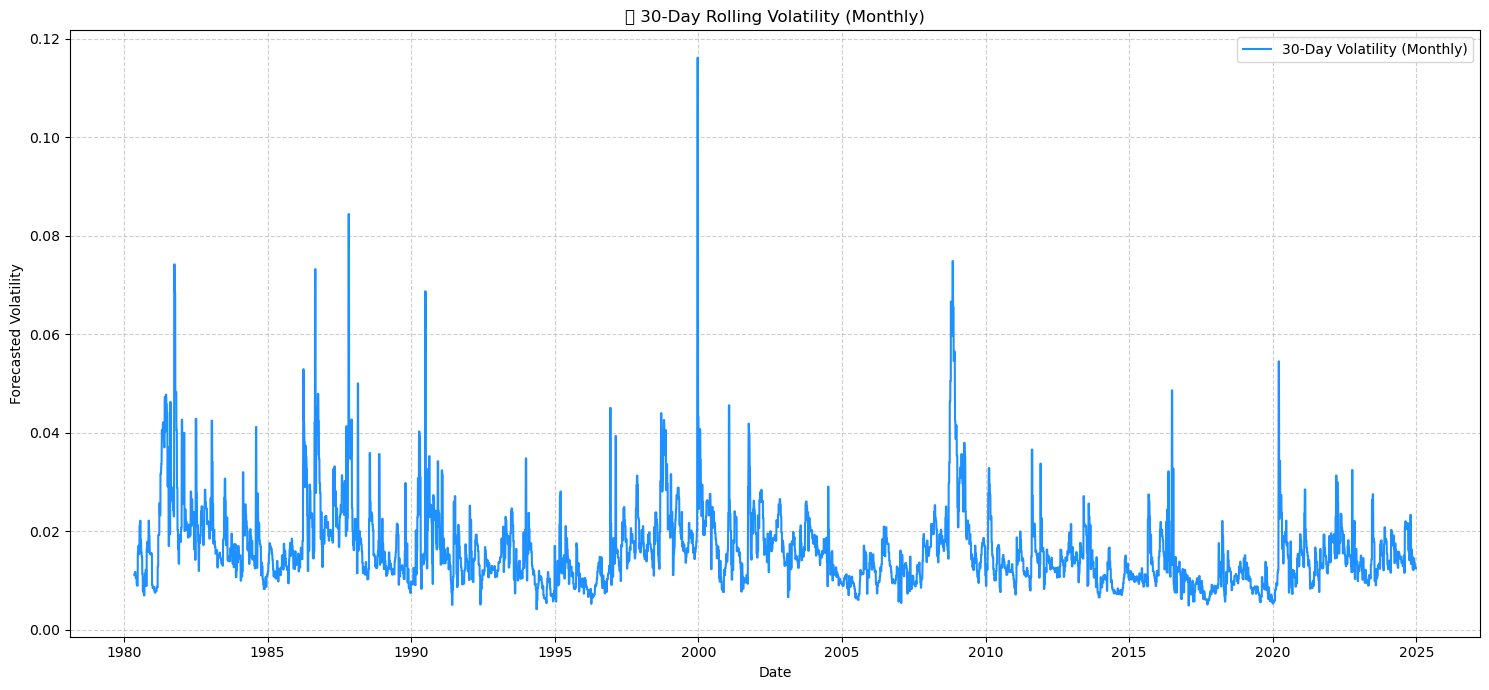


📊 Generating 90-Day Volatility Plot...


C:\Users\PRANAV\AppData\Local\Temp\ipykernel_1204\689738787.py:111: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\PRANAV\anaconda3\envs\risk_analysis\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


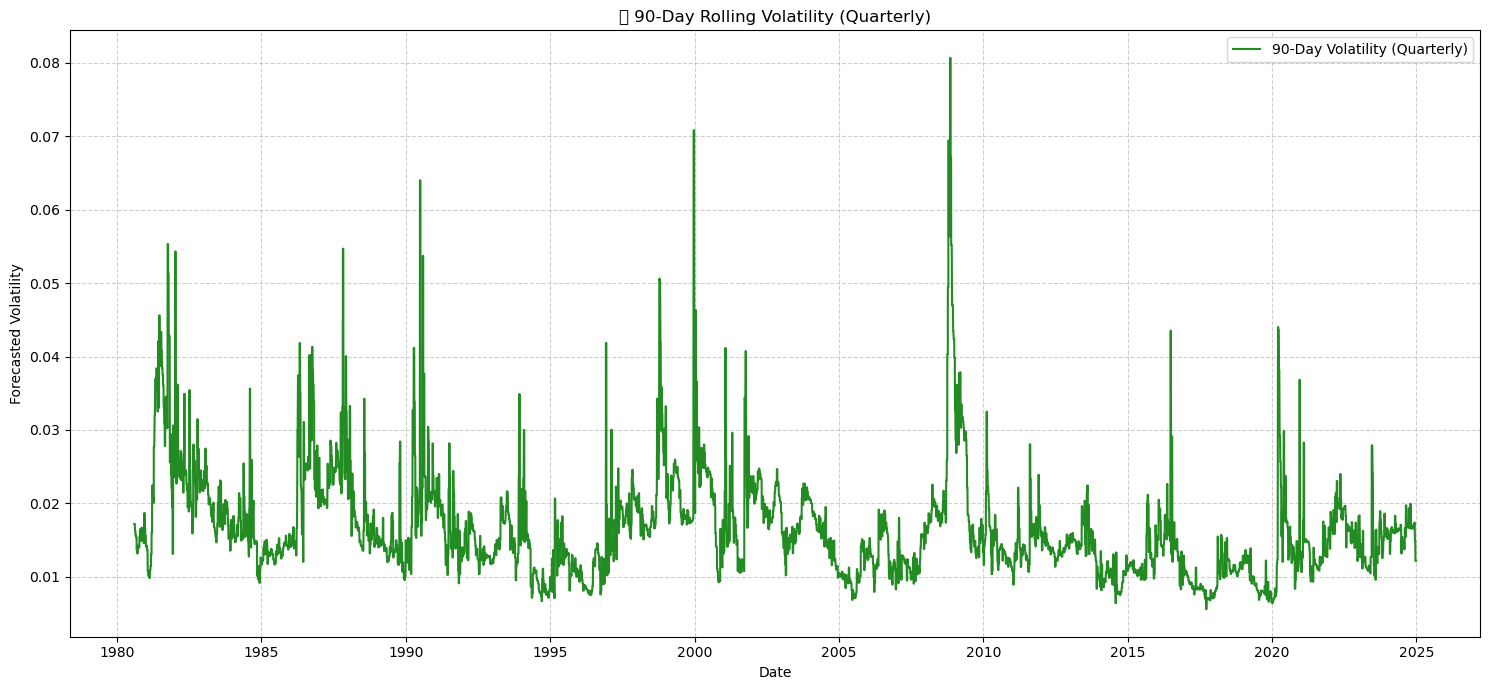


📊 Generating 250-Day Volatility Plot...


C:\Users\PRANAV\AppData\Local\Temp\ipykernel_1204\689738787.py:123: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\PRANAV\anaconda3\envs\risk_analysis\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


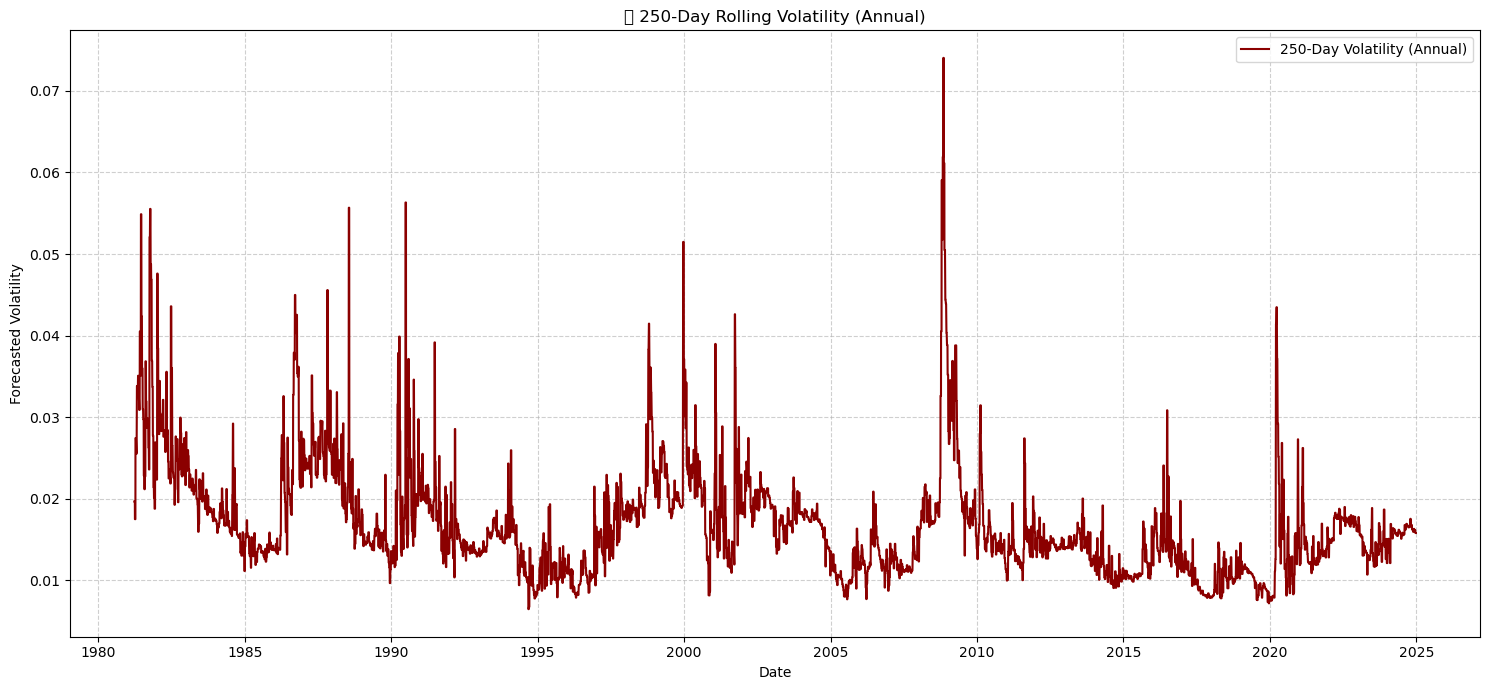

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from arch import arch_model
from tqdm import tqdm
#-----------------------------------------
# STEP 1: DEFINE THE COMPUTATION FUNCTION
#-------------------------------------------
def compute_rolling_volatility(df, window):
    filename = f"rolling_vol_{window}d.csv"
    
    if os.path.exists(filename):
        print(f"CSV already exists: '{filename}' — skipping GARCH computation.")
        vol_df = pd.read_csv(filename, parse_dates=['Date'])
        # The column from the CSV is merged in here
        df = pd.merge(df, vol_df, on='Date', how='left')
        # This line fills any gaps in the newly merged column
        df[f'RollingVolatility_{window}d'] = df[f'RollingVolatility_{window}d'].fillna(method='ffill')
        return df

    print(f" Computing GARCH rolling volatility for {window}-day window...")

    rolling_vol = []
    rolling_dates = []

    for i in tqdm(range(window, len(df), 5)):
        window_data = df['LogReturn'].iloc[i - window:i]
        model = arch_model(window_data, vol='Garch', p=1, q=1)
        model_fit = model.fit(disp='off', update_freq=0)
        forecast = model_fit.forecast(horizon=1)
        predicted_vol = np.sqrt(forecast.variance.values[-1][0])
        rolling_vol.append(predicted_vol)
        rolling_dates.append(df['Date'].iloc[i])

    rolling_df = pd.DataFrame({
        'Date': rolling_dates,
        f'RollingVolatility_{window}d': rolling_vol
    })
    rolling_df.to_csv(filename, index=False)
    print(f"✅ Saved rolling volatility to '{filename}'")

    df = pd.merge(df, rolling_df, on='Date', how='left')
    df[f'RollingVolatility_{window}d'] = df[f'RollingVolatility_{window}d'].fillna(method='ffill')
    return df

#------------------------------------------------------
# STEP 2: CLEAN THE DATAFRAME TO PREVENT COLUMN CONFLICTS
#---------------------------------------------------------
print("--- Cleaning DataFrame before computation ---")
# List of columns we are about to create
cols_to_drop = ['RollingVolatility_7d', 'RollingVolatility_30d', 'RollingVolatility_90d', 'RollingVolatility_250d']

# Safely drop them if they exist. errors='ignore' prevents errors if a column is already missing.
df = df.drop(columns=cols_to_drop, errors='ignore')
print("DataFrame cleaned.")

#-------------------------------------------
# STEP 3: RUN THE COMPUTATION LOOP
#----------------------------------------------
print("\n--- Starting Computations ---")
for w in [7, 30, 90, 250]:
    df = compute_rolling_volatility(df, window=w)

# --- Verification Step ---
print("\n--- Computation Complete ---")
print("All columns are now available in the DataFrame:")
print(df.columns)

#-------------------------------------------
# STEP 4: GENERATE ALL PLOTS
#-----------------------------------------------


# --- 7-Day Plot ---
print("\n Generating 7-Day Volatility Plot...")
plt.figure(figsize=(15, 7))
plt.plot(df['Date'], df['RollingVolatility_7d'], label='7-Day Volatility (Weekly)', color='purple')
plt.title(" 7-Day Rolling Volatility (Weekly)")
plt.xlabel("Date")
plt.ylabel("Forecasted Volatility")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- 30-Day Plot ---
print("\n Generating 30-Day Volatility Plot...")
plt.figure(figsize=(15, 7))
plt.plot(df['Date'], df['RollingVolatility_30d'], label='30-Day Volatility (Monthly)', color='dodgerblue')
plt.title(" 30-Day Rolling Volatility (Monthly)")
plt.xlabel("Date")
plt.ylabel("Forecasted Volatility")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- 90-Day Plot ---
print("\n Generating 90-Day Volatility Plot...")
plt.figure(figsize=(15, 7))
plt.plot(df['Date'], df['RollingVolatility_90d'], label='90-Day Volatility (Quarterly)', color='forestgreen')
plt.title(" 90-Day Rolling Volatility (Quarterly)")
plt.xlabel("Date")
plt.ylabel("Forecasted Volatility")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- 250-Day Plot ---
print("\n Generating 250-Day Volatility Plot...")
plt.figure(figsize=(15, 7))
plt.plot(df['Date'], df['RollingVolatility_250d'], label='250-Day Volatility (Annual)', color='darkred')
plt.title(" 250-Day Rolling Volatility (Annual)")
plt.xlabel("Date")
plt.ylabel("Forecasted Volatility")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## plot


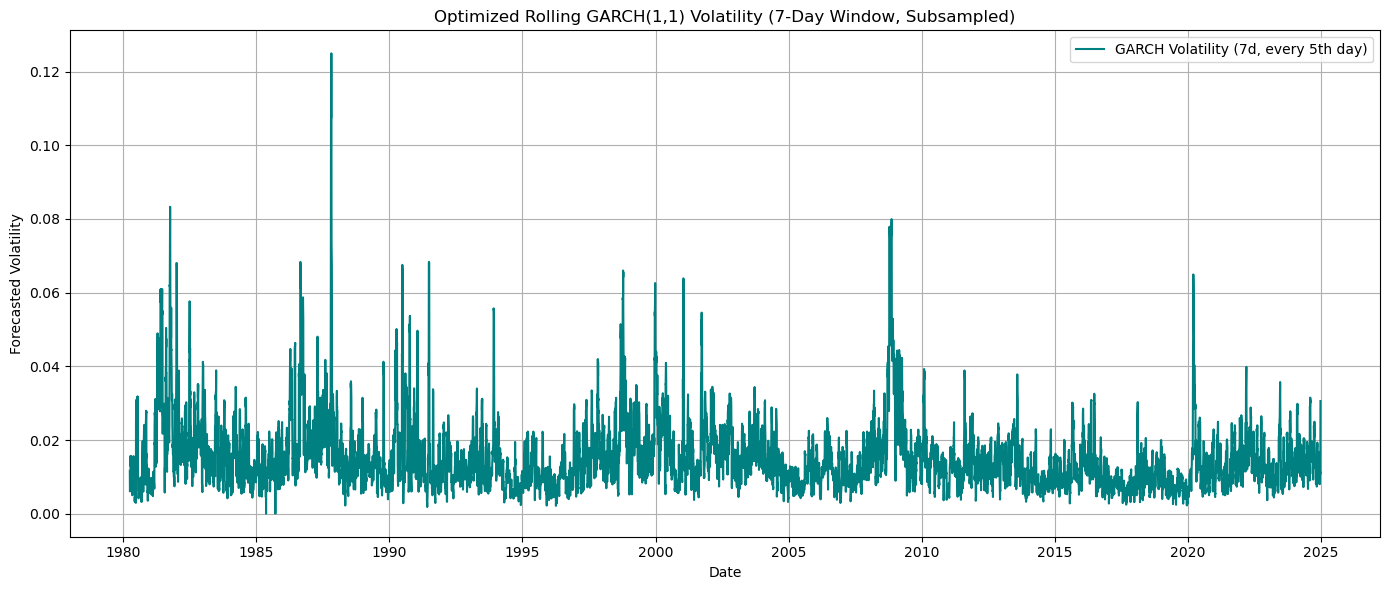

In [99]:
# Plot
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['RollingVolatility_7d'], label='GARCH Volatility (7d, every 5th day)', color='teal')
plt.title("Optimized Rolling GARCH(1,1) Volatility (7-Day Window, Subsampled)")
plt.xlabel("Date")
plt.ylabel("Forecasted Volatility")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Load and sort the data
df = pd.read_csv('data/toyotaData.csv', parse_dates=['Date'], dayfirst=True)
df = df.sort_values("Date").reset_index(drop=True)

# Log Returns
df["LogReturn"] = np.log(df["Adj Close"] / df["Adj Close"].shift(1))
df.dropna(inplace=True)

# Feature Engineering
df["MA_5"] = df["Adj Close"].rolling(5).mean()
df["MA_10"] = df["Adj Close"].rolling(10).mean()
df["Momentum"] = df["LogReturn"] - df["LogReturn"].shift(1)
df["Lag1_Return"] = df["LogReturn"].shift(1)
df["Lag2_Return"] = df["LogReturn"].shift(2)
df["Lag1_Volatility"] = df["LogReturn"].rolling(window=7).std().shift(1)

# Simulated Rolling GARCH 
df["RollingVolatility_7d"] = df["LogReturn"].rolling(window=7).std()

# Target = Tomorrow’s rolling volatility
df["TargetVolatility"] = df["RollingVolatility_7d"].shift(-1)
df.dropna(inplace=True)

# Features and target
features = ["LogReturn", "MA_5", "MA_10", "Momentum", "Lag1_Return", "Lag2_Return", "Lag1_Volatility"]
X = df[features]
y = df["TargetVolatility"]

# Chronological split (80% train, 20% test)
split = int(0.8 * len(X))
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]


C:\Users\PRANAV\AppData\Local\Temp\ipykernel_1204\1196859356.py:5: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df = pd.read_csv('data/toyotaData.csv', parse_dates=['Date'], dayfirst=True)


MAE:  0.002037
RMSE: 0.002921
R²:   0.8020


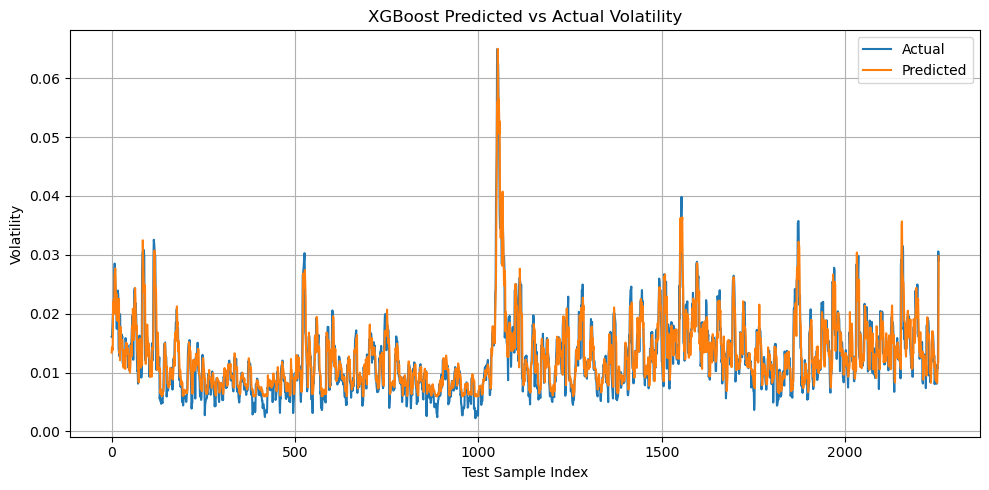

In [90]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize and train
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.6f}")
print(f"RMSE: {rmse:.6f}")
print(f"R²:   {r2:.4f}")

# Plot predicted vs actual
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('XGBoost Predicted vs Actual Volatility')
plt.xlabel('Test Sample Index')
plt.ylabel('Volatility')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


## ##########

## h

C:\Users\PRANAV\AppData\Local\Temp\ipykernel_1204\1091197639.py:5: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\PRANAV\anaconda3\envs\risk_analysis\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


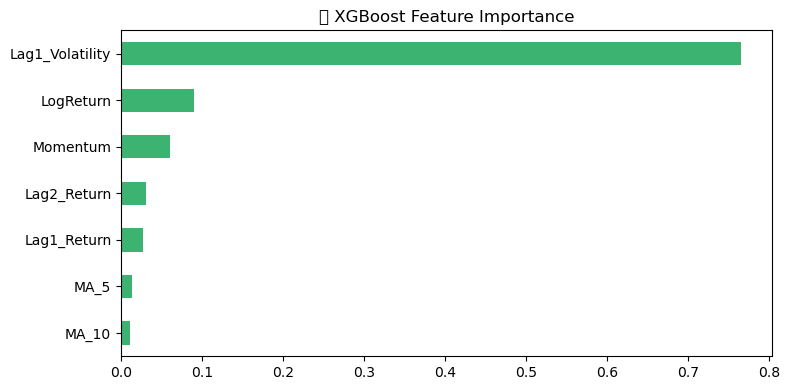

In [ ]:
plt.figure(figsize=(8,4))
pd.Series(model.feature_importances_, index=X_train.columns)\
    .sort_values().plot(kind='barh', color='mediumseagreen')
plt.title(" XGBoost Feature Importance")
plt.tight_layout()
plt.show()



identified 113 high-risk days (outliers) in the test set.
           Date    Actual  Predicted
9041 2016-01-21  0.027297   0.020053
9042 2016-01-22  0.028523   0.026325
9043 2016-01-25  0.028314   0.026961
9044 2016-01-26  0.025168   0.027675
9117 2016-05-10  0.027274   0.011271


C:\Users\PRANAV\AppData\Local\Temp\ipykernel_1204\2851398128.py:33: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\PRANAV\anaconda3\envs\risk_analysis\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


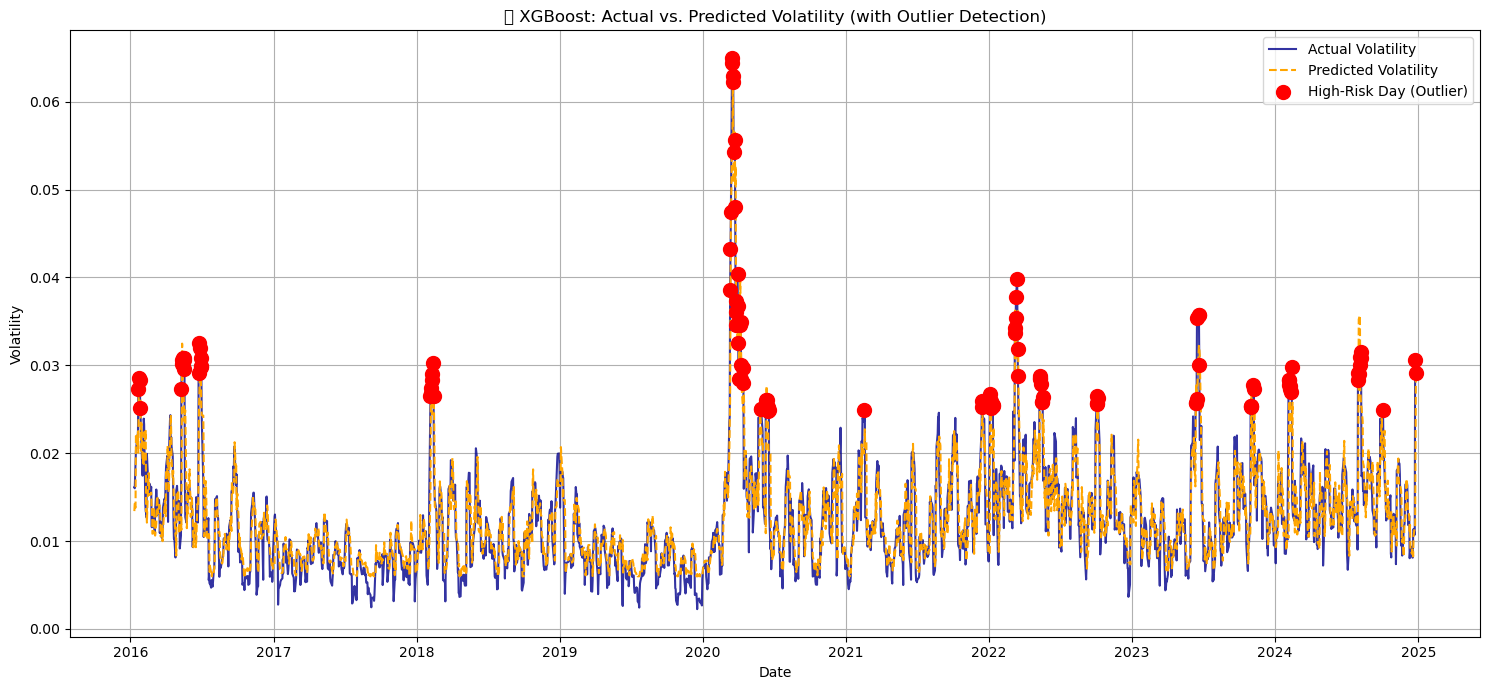


🔮 Forecasting Volatility for the Next Trading Day
Last available data point is for date: 2024-12-26
Predicted Volatility for the next day (2024-12-27): 0.029761


In [ ]:
# --- This code should come after you have trained your model and created y_test, y_pred ---

# 1. ENHANCED PLOT: Create a DataFrame for easier plotting with dates
results_df = pd.DataFrame({
    'Date': df['Date'].iloc[split:], # Use the dates from the original test set split
    'Actual': y_test,
    'Predicted': y_pred
})

# 2. OUTLIER DETECTION: Identify high-volatility days (outliers)
# We'll define an outlier as any day where actual volatility was in the top 5%
outlier_threshold = results_df['Actual'].quantile(0.95)
results_df['Outlier'] = results_df['Actual'] > outlier_threshold
outliers = results_df[results_df['Outlier']]

print(f"\nidentified {len(outliers)} high-risk days (outliers) in the test set.")
print(outliers[['Date', 'Actual', 'Predicted']].head())


# 3. VISUALIZATION: Plot with dates and highlight the outliers
plt.figure(figsize=(15, 7))
plt.plot(results_df['Date'], results_df['Actual'], label='Actual Volatility', color='darkblue', alpha=0.8)
plt.plot(results_df['Date'], results_df['Predicted'], label='Predicted Volatility', color='orange', linestyle='--')

# Add scatter points for the detected outliers
plt.scatter(outliers['Date'], outliers['Actual'], color='red', marker='o', s=100, label='High-Risk Day (Outlier)', zorder=5)

plt.title(" XGBoost: Actual vs. Predicted Volatility (with Outlier Detection)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 4. FORECASTING: Predict the volatility for the day AFTER the dataset ends
print("\n" + "="*50)
print("🔮 Forecasting Volatility for the Next Trading Day")
print("="*50)

# Get the very last row of the full dataframe to use its features
last_available_data = df[features].iloc[-1:]

# Use the trained model to predict on this last row
# The result is the forecast for the *next* day
future_prediction = model.predict(last_available_data)

# Get the date of the last data point and find the next day
last_date = df['Date'].iloc[-1]
next_day = last_date + pd.Timedelta(days=1)

print(f"Last available data point is for date: {last_date.date()}")
print(f"Predicted Volatility for the next day ({next_day.date()}): {future_prediction[0]:.6f}")

🚀 Starting 365-day recursive forecast simulation...


Forecasting Progress: 100%|██████████| 365/365 [00:06<00:00, 53.81it/s]
C:\Users\PRANAV\AppData\Local\Temp\ipykernel_1204\3384750028.py:101: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()



✅ Simulation Complete.


c:\Users\PRANAV\anaconda3\envs\risk_analysis\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


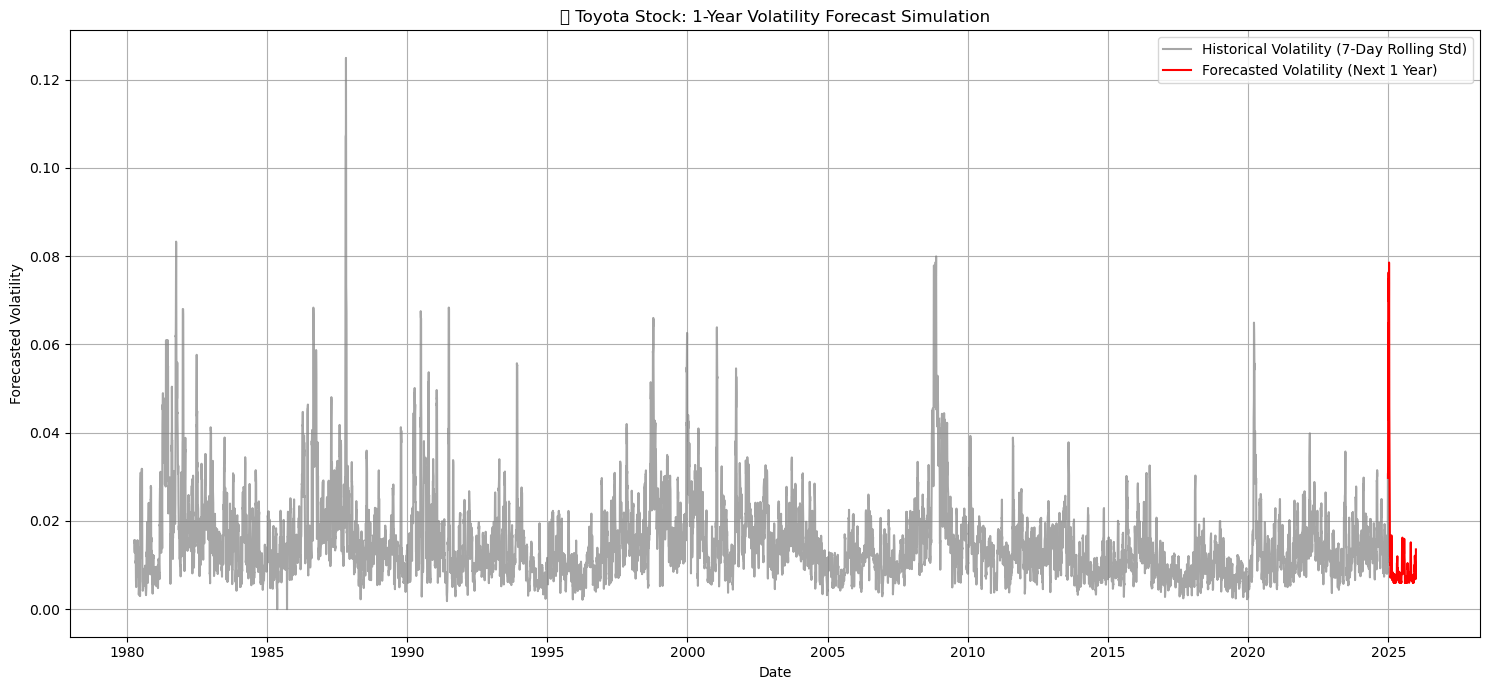

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm # A library to show progress bars



# 1. SETUP THE SIMULATION
days_to_forecast = 365
# Create a copy of your data to safely add new simulated rows
forecast_df = df.copy()

# This list will store our daily volatility predictions
future_volatility_preds = []

print(f"🚀 Starting {days_to_forecast}-day recursive forecast simulation...")

# 2. RUN THE RECURSIVE FORECASTING LOOP
for _ in tqdm(range(days_to_forecast), desc="Forecasting Progress"):
    # --- Get the latest available features ---
    last_features = forecast_df[features].iloc[-1:].values

    # --- Predict next day's volatility ---
    predicted_vol = model.predict(last_features)[0]
    future_volatility_preds.append(predicted_vol)

    # --- Simulate next day's stock price to generate new features ---
    # We need a price to calculate MAs, LogReturn, etc. for the next iteration.
    # We'll simulate it using the predicted volatility.
    
    # Get the last known price
    last_price = forecast_df['Adj Close'].iloc[-1]
    
    # Assume the average historical daily return as the drift (mu)
    mu = forecast_df['LogReturn'].mean()
    # Use our model's prediction as the volatility (sigma)
    sigma = predicted_vol
    
    # Simulate the next log return and calculate the next day's price
    simulated_log_return = np.random.normal(mu, sigma)
    next_day_price = last_price * np.exp(simulated_log_return)

    # --- Create a new row for the next day ---
    last_date = forecast_df['Date'].iloc[-1]
    next_date = last_date + pd.Timedelta(days=1)
    
    # Create a dictionary for the new row
    new_row = {
        'Date': next_date,
        'Adj Close': next_day_price,
        # We need to fill other columns so we can recalculate features
        'LogReturn': simulated_log_return 
    }
    
    # Append the new simulated row to our dataframe
    forecast_df = pd.concat([forecast_df, pd.DataFrame([new_row])], ignore_index=True)

    # --- Recalculate features that depend on past data for the newly added row ---
    # This is the most critical step for the next loop iteration
    forecast_df["MA_5"] = forecast_df["Adj Close"].rolling(5).mean()
    forecast_df["MA_10"] = forecast_df["Adj Close"].rolling(10).mean()
    forecast_df["Momentum"] = forecast_df["LogReturn"] - forecast_df["LogReturn"].shift(1)
    forecast_df["Lag1_Return"] = forecast_df["LogReturn"].shift(1)
    forecast_df["Lag2_Return"] = forecast_df["LogReturn"].shift(2)
    # The actual volatility is unknown, but we need the feature for the model.
    # We use a rolling std of simulated returns as a proxy.
    forecast_df["Lag1_Volatility"] = forecast_df["LogReturn"].rolling(window=7).std().shift(1)

# 3. PREPARE FOR PLOTTING
# Create a date range for the forecast period
last_real_date = df['Date'].iloc[-1]
forecast_dates = pd.date_range(start=last_real_date + pd.Timedelta(days=1), periods=days_to_forecast)

# Create a final DataFrame with the forecast
forecast_results_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted_Volatility': future_volatility_preds
})

print("\n✅ Simulation Complete.")

# 4. VISUALIZE THE FORECAST
plt.figure(figsize=(15, 7))

# Plot historical volatility (using a rolling std as a proxy for the chart)
plt.plot(df['Date'], df['LogReturn'].rolling(window=7).std(), label='Historical Volatility (7-Day Rolling Std)', color='gray', alpha=0.7)

# Plot the 1-year forecast
plt.plot(forecast_results_df['Date'], forecast_results_df['Forecasted_Volatility'], label='Forecasted Volatility (Next 1 Year)', color='red')

plt.title(" Toyota Stock: 1-Year Volatility Forecast Simulation")
plt.xlabel("Date")
plt.ylabel("Forecasted Volatility")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

📊 Aggregating daily predictions into monthly averages...


C:\Users\PRANAV\AppData\Local\Temp\ipykernel_1204\2401122954.py:44: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\PRANAV\anaconda3\envs\risk_analysis\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


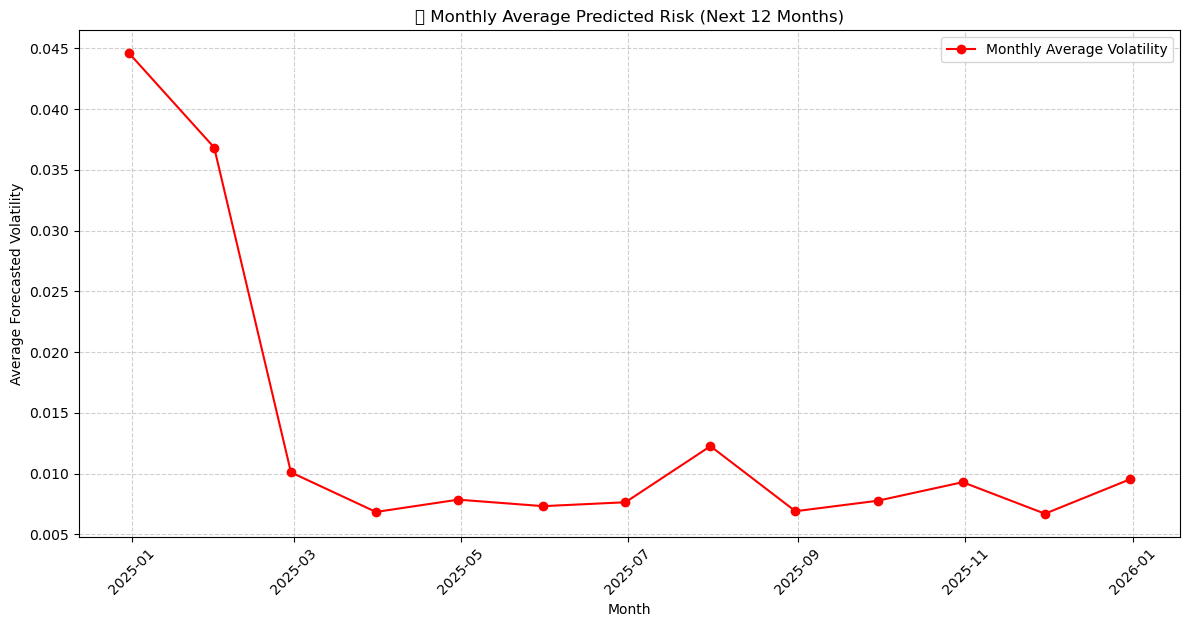

In [95]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter

# --- Prerequisite ---
# This code requires the 'forecast_results_df' DataFrame, which contains
# the daily 'Date' and 'Forecasted_Volatility' for the next year.
# ----------------------

print("📊 Aggregating daily predictions into monthly averages...")

# Create a copy to avoid changing the original DataFrame
monthly_df = forecast_results_df.copy()

# Set the 'Date' as the index to perform time-based resampling
monthly_df.set_index('Date', inplace=True)

# Resample the data by month ('ME' stands for Month End) and calculate the mean
monthly_avg_vol = monthly_df['Forecasted_Volatility'].resample('ME').mean()

# Convert the result back to a DataFrame for plotting
monthly_avg_df = monthly_avg_vol.reset_index()


# --- Plotting the Monthly Data ---
plt.figure(figsize=(12, 6))

# Use style='-o' to draw lines connecting circular markers at each data point
plt.plot(
    monthly_avg_df['Date'],
    monthly_avg_df['Forecasted_Volatility'],
    label='Monthly Average Volatility',
    color='red',
    marker='o', # Adds a circle marker for each month
    linestyle='-'  # Connects the markers with a line
)

# Formatting the plot for clarity
plt.title("📈 Monthly Average Predicted Risk (Next 12 Months)")
plt.xlabel("Month")
plt.ylabel("Average Forecasted Volatility")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Ensure the x-axis ticks are formatted to show Month-Year
ax = plt.gca()
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m"))
plt.xticks(rotation=45)


# Display the plot
plt.show()

In [113]:
print(df.columns)

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'LogReturn', 'MA_5', 'MA_10', 'Momentum', 'Lag1_Return', 'Lag2_Return',
       'Lag1_Volatility', 'TargetVolatility', 'RollingVolatility_7d',
       'RollingVolatility_30d', 'RollingVolatility_90d',
       'RollingVolatility_250d'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm

# 1. RUN THE FORECAST SIMULATION (As before)
days_to_forecast = 365
forecast_df = df.copy()
future_volatility_preds = []

for _ in tqdm(range(days_to_forecast), desc="Forecasting Progress"):
    last_features = forecast_df[features].iloc[-1:].values
    predicted_vol = model.predict(last_features)[0]
    future_volatility_preds.append(predicted_vol)
    
    last_price = forecast_df['Adj Close'].iloc[-1]
    mu = forecast_df['LogReturn'].mean()
    sigma = predicted_vol # Use the predicted volatility
    simulated_log_return = np.random.normal(mu, sigma)
    next_day_price = last_price * np.exp(simulated_log_return)
    
    last_date = forecast_df['Date'].iloc[-1]
    next_date = last_date + pd.Timedelta(days=1)
    
    new_row = {'Date': next_date, 'Adj Close': next_day_price, 'LogReturn': simulated_log_return}
    forecast_df = pd.concat([forecast_df, pd.DataFrame([new_row])], ignore_index=True)
    
    # Recalculate features for the new row
    forecast_df["MA_5"] = forecast_df["Adj Close"].rolling(5).mean()
    forecast_df["MA_10"] = forecast_df["Adj Close"].rolling(10).mean()
    forecast_df["Momentum"] = forecast_df["LogReturn"] - forecast_df["LogReturn"].shift(1)
    forecast_df["Lag1_Return"] = forecast_df["LogReturn"].shift(1)
    forecast_df["Lag2_Return"] = forecast_df["LogReturn"].shift(2)
    forecast_df["Lag1_Volatility"] = forecast_df["LogReturn"].rolling(window=7).std().shift(1)

# 2. CREATE THE RISK SCORE DATAFRAME
last_real_date = df['Date'].iloc[-1]
forecast_dates = pd.date_range(start=last_real_date + pd.Timedelta(days=1), periods=days_to_forecast)

risk_df = pd.DataFrame({
    'Date': forecast_dates,
    'PredictedVolatility': future_volatility_preds
})

# 3. CONVERT VOLATILITY TO A 0-100 RISK SCORE
# Find the maximum historical volatility to use as a benchmark
# Using a 7-day rolling standard deviation for historical volatility
historical_max_vol = df['LogReturn'].rolling(window=7).std().max()

# Scale the prediction: (Predicted Vol / Historical Max Vol) * 100
# We cap the score at 100 for any value exceeding the historical max
risk_df['RiskScore_Percent'] = (risk_df['PredictedVolatility'] / historical_max_vol) * 100
risk_df['RiskScore_Percent'] = risk_df['RiskScore_Percent'].clip(0, 100).round(2)


# 4. SAVE TO CSV
risk_df.to_csv('predicted_risk_scores.csv', index=False)

print("\n✅ Successfully created 'predicted_risk_scores.csv'")
print(risk_df.head())

Forecasting Progress: 100%|██████████| 365/365 [00:09<00:00, 39.90it/s]


✅ Successfully created 'predicted_risk_scores.csv'
        Date  PredictedVolatility  RiskScore_Percent
0 2024-12-27             0.029761          23.820000
1 2024-12-28             0.034199          27.370001
2 2024-12-29             0.038790          31.049999
3 2024-12-30             0.036305          29.059999
4 2024-12-31             0.036673          29.350000


In [116]:
import joblib

# Assuming 'model' is your trained XGBoost model
joblib.dump(model, 'xgboost_risk_model.joblib')

print("✅ Model saved successfully to 'xgboost_risk_model.joblib'")

✅ Model saved successfully to 'xgboost_risk_model.joblib'
